In [23]:
import requests, json, os, datetime
import gspread
from oauth2client.service_account import ServiceAccountCredentials

scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

#localpath = os.path.abspath(os.path.dirname(__file__))

localpath = 'C:\\Users\\jiangsir\\Documents\\20190420-PythonCrawler\\'
credentials = ServiceAccountCredentials.from_json_keyfile_name(localpath+'20190420-myserviceaccount.json', scope)
gc = gspread.authorize(credentials)
url = 'https://docs.google.com/spreadsheets/d/1Lp42K9Q2fFlfn6wtVYDlmD37Kn9znzzIfZHozfkphl0/edit?usp=sharing'
doc = gc.open_by_url(url)
wks = doc.worksheet('sheet1')
wks.update_acell('A1', '測站')
wks.update_acell('B1', 'PM25')
wks.update_acell('C1', '日期')


# 若來源資料為 https 則加上 verify=False 參數
response = requests.get('https://opendata.epa.gov.tw/ws/Data/ATM00625/?$format=json', verify=False)
sites = response.json()
for site in sites:
    if site['Site'] == '林園':
        wks.insert_row([site['Site'],  site['PM25'], site['DataCreationDate'], str(datetime.datetime.now())], 2)
        print(site)


C:\Users\jiangsir\Anaconda3\lib\site-packages\urllib3\connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


{'Site': '林園', 'county': '高雄市', 'PM25': '10', 'DataCreationDate': '2019-04-19 21:00', 'ItemUnit': 'μg/m3'}


# 將爬取 PM2.5 的程式放入排程自動執行

## 由於爬蟲程式使用了 conda 的虛擬環境，因此要透過一個 bat 執行檔來執行 python

## 請將已下 程式碼存成 PM25.bat 準備讓排程程式呼叫

    setlocal enableextensions enabledelayedexpansion

    set CONDA_NAME=base

    IF EXIST %ALLUSERSPROFILE%\Anaconda3\ (
    call %ALLUSERSPROFILE%\Anaconda3\Scripts\activate.bat %ALLUSERSPROFILE%\Anaconda3
    set ANACONDA_PATH=%ALLUSERSPROFILE%\Anaconda3
    echo alluser
    ) ELSE (
        IF EXIST %HomeDrive%%HomePath%\Anaconda3\ (
            call %HomeDrive%%HomePath%\Anaconda3\Scripts\activate.bat %HomeDrive%%HomePath%\Anaconda3
            set ANACONDA_PATH=%HomeDrive%%HomePath%\Anaconda3
            echo one user
        ) ELSE (
            echo Please INSTALL Anaconda First!
        )
    )

    SET PATH=%PATH%;%ANACONDA_PATH%;%ANACONDA_PATH%\Scripts\;


    call conda activate %CONDA_NAME%
    call python %~dp0\PM25.py
    rem python C:\Users\user\Documents\FacePI\website\manage.py runserver 0.0.0.0:8000
    rem call conda deactivate

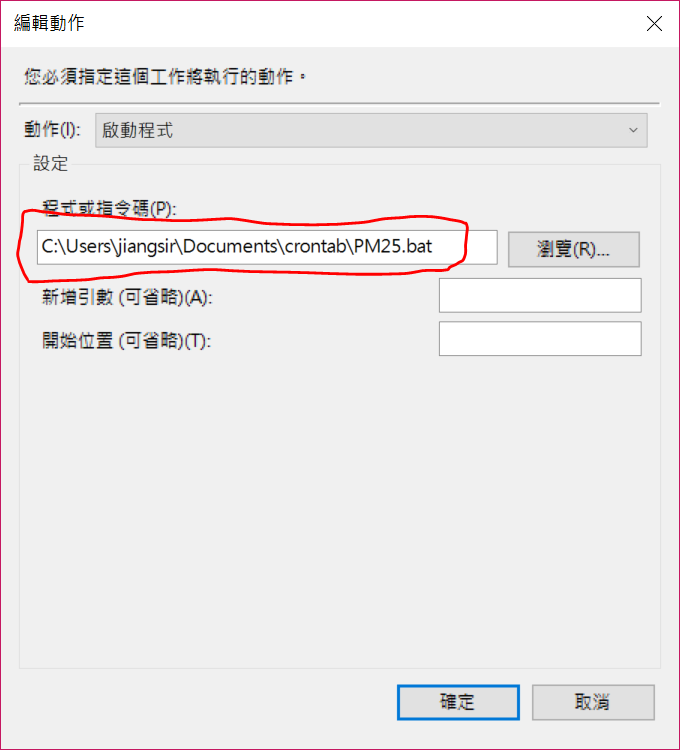